In [79]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [80]:
import matplotlib
from matplotlib import pyplot as plt
# sns.set_style("whitegrid")
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [81]:
root_paths=[
    '../results/sw/sw_CAE_h32_k5_ReZero_default_none_none',
    '../results/sw/sw_CAE_h32_k5_NeuralODE_no_exp_none_none',
    '../results/sw/sw_AEflow_b4_k5_ReZero_default_none_none',
    '../results/sw/sw_AEflow_b4_k5_NeuralODE_no_exp_none_none',
    '../results/sw/sw_SINRv11_default_ReZero_default_none_none',
    '../results/sw/sw_SINRv11_default_NeuralODE_no_exp_none_none',
    '../results/sw/sw_SINRv11_default_NeuralODE_no_exp_scalar_default',
    '../results/sw/sw_SINRv11_default_NeuralODE_no_exp_diagonal_default',
]

In [82]:

import glob

df = pd.concat(
    [
    pd.concat(
        [pd.read_pickle(f) 
         for f in glob.glob(root_path + "/*dataframe.pkl")],
        ignore_index=True)
    for root_path in root_paths
],
    ignore_index=True)
df

,kf_name,step,feature_idx,rmse,ed_name,ld_name,ue_name,ens_num,infl,sigma_z_b,sigma_m
0,EnKF,0,0,0.053693,CAE_h32_k5,ReZero_default,none_none,32,1.1,0.1,0.01
1,EnKF,0,1,0.156845,CAE_h32_k5,ReZero_default,none_none,32,1.1,0.1,0.01
2,EnKF,1,0,0.053698,CAE_h32_k5,ReZero_default,none_none,32,1.1,0.1,0.01
3,EnKF,1,1,0.156180,CAE_h32_k5,ReZero_default,none_none,32,1.1,0.1,0.01
4,EnKF,2,0,0.053258,CAE_h32_k5,ReZero_default,none_none,32,1.1,0.1,0.01
...,...,...,...,...,...,...,...,...,...,...,...
1838755,ETKF-Q,196,1,0.089101,SINRv11_default,NeuralODE_no_exp,diagonal_default,64,1.1,NaN,NaN
1838756,ETKF-Q,197,0,0.045347,SINRv11_default,NeuralODE_no_exp,diagonal_default,64,1.1,NaN,NaN
1838757,ETKF-Q,197,1,0.089226,SINRv11_default,NeuralODE_no_exp,diagonal_default,64,1.1,NaN,NaN
1838758,ETKF-Q,198,0,0.046166,SINRv11_default,NeuralODE_no_exp,diagonal_default,64,1.1,NaN,NaN


# Renaming

In [83]:
df[df == 'CAE_h32_k5'] = 'CAE'
df[df == 'AEflow_b4_k5'] = 'AEflow'
df[df == 'SINRv11_default'] = 'SINR'

df[df == 'ReZero_default'] = '+ReZero'
df[df == 'NeuralODE_no_exp'] = '+NeuralODE'
df[df == 'none_none'] = ''
df[df == 'diagonal_default'] = '+diagonal'
df[df == 'scalar_default'] = '+scalar'

In [84]:
df['model'] = df['ed_name'] + df['ld_name'] + df['ue_name']

# df['model'] = df['ed_name'] + '+' + df['ld_name'] + '+' + df['ue_name']
# df[df == 'CAE+ReZero+none'] = 'CAE+ReZero'
# df[df == 'SINR+NeuralODE+none'] = 'SINR+NeuralODE (LAINR, ours)'
# df[df == 'SINR+NeuralODE+diagonal'] = 'SINR+NeuralODE w/ est. (LAINR, ours)'
df.drop(columns=['ed_name', 'ld_name', 'ue_name'], inplace=True)
print('#trajs:', len(df) / 199 / 2)
df

#trajs: 4620.0


,kf_name,step,feature_idx,rmse,ens_num,infl,sigma_z_b,sigma_m,model
0,EnKF,0,0,0.053693,32,1.1,0.1,0.01,CAE+ReZero
1,EnKF,0,1,0.156845,32,1.1,0.1,0.01,CAE+ReZero
2,EnKF,1,0,0.053698,32,1.1,0.1,0.01,CAE+ReZero
3,EnKF,1,1,0.156180,32,1.1,0.1,0.01,CAE+ReZero
4,EnKF,2,0,0.053258,32,1.1,0.1,0.01,CAE+ReZero
...,...,...,...,...,...,...,...,...,...
1838755,ETKF-Q,196,1,0.089101,64,1.1,NaN,NaN,SINR+NeuralODE+diagonal
1838756,ETKF-Q,197,0,0.045347,64,1.1,NaN,NaN,SINR+NeuralODE+diagonal
1838757,ETKF-Q,197,1,0.089226,64,1.1,NaN,NaN,SINR+NeuralODE+diagonal
1838758,ETKF-Q,198,0,0.046166,64,1.1,NaN,NaN,SINR+NeuralODE+diagonal


In [85]:
df['sigma_z_b'].fillna(-1, inplace=True)
df['sigma_m'].fillna(-1, inplace=True)
df_grouped = df.groupby(['ens_num', 'model', 'infl', 'sigma_z_b', 'sigma_m', 'kf_name'])['rmse'].mean()
print('trajs:', len(df) / 199 / 2)
print(f'{len(df_grouped)=}')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_grouped)
# df

trajs: 4620.0
len(df_grouped)=4020
ens_num  model                    infl  sigma_z_b  sigma_m  kf_name
32       AEflow+NeuralODE         1.02   0.01       0.0001  DEnKF      0.095763
                                                            ETKF       0.093603
                                                            ETKF-Q     0.099245
                                                            EnKF       0.097117
                                                            SEnKF      0.108863
                                                    0.0003  DEnKF      0.093246
                                                            ETKF       0.090304
                                                            ETKF-Q     0.095266
                                                            EnKF       0.095354
                                                            SEnKF      0.108860
                                                    0.0010  DEnKF      0.092736
                 

In [86]:
df_avg_rmse = df_grouped.reset_index()
with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(df_avg_rmse)


,ens_num,model,infl,sigma_z_b,sigma_m,kf_name,rmse
0,32,AEflow+NeuralODE,1.02,0.01,0.0001,DEnKF,0.095763
1,32,AEflow+NeuralODE,1.02,0.01,0.0001,ETKF,0.093603
2,32,AEflow+NeuralODE,1.02,0.01,0.0001,ETKF-Q,0.099245
3,32,AEflow+NeuralODE,1.02,0.01,0.0001,EnKF,0.097117
4,32,AEflow+NeuralODE,1.02,0.01,0.0001,SEnKF,0.108863
...,...,...,...,...,...,...,...
4015,64,SINR+ReZero,1.10,0.10,0.1000,DEnKF,0.386303
4016,64,SINR+ReZero,1.10,0.10,0.1000,ETKF,0.301422
4017,64,SINR+ReZero,1.10,0.10,0.1000,ETKF-Q,0.215582
4018,64,SINR+ReZero,1.10,0.10,0.1000,EnKF,0.242053


In [87]:
df_avg_rmse['kf_id'] = df_avg_rmse['kf_name'].map({
    'EnKF': 0,
    'SEnKF': 1,
    'DEnKF': 2,
    'ETKF': 3,
    'ETKF-Q': 4,
})
df_avg_rmse.sort_values(by=['kf_id'], kind='stable', inplace=True)
df_avg_rmse = df_avg_rmse.reset_index(drop=True)
with pd.option_context('display.max_rows', 50, 'display.max_columns', None):
    display(df_avg_rmse)

,ens_num,model,infl,sigma_z_b,sigma_m,kf_name,rmse,kf_id
0,32,AEflow+NeuralODE,1.02,0.01,0.0001,EnKF,0.097117,0
1,32,AEflow+NeuralODE,1.02,0.01,0.0003,EnKF,0.095354,0
2,32,AEflow+NeuralODE,1.02,0.01,0.0010,EnKF,0.094724,0
3,32,AEflow+NeuralODE,1.02,0.01,0.0030,EnKF,0.096110,0
4,32,AEflow+NeuralODE,1.02,0.01,0.0100,EnKF,0.097539,0
...,...,...,...,...,...,...,...,...
4015,64,SINR+ReZero,1.10,0.10,0.0010,ETKF-Q,0.225230,4
4016,64,SINR+ReZero,1.10,0.10,0.0030,ETKF-Q,0.228294,4
4017,64,SINR+ReZero,1.10,0.10,0.0100,ETKF-Q,0.228817,4
4018,64,SINR+ReZero,1.10,0.10,0.0300,ETKF-Q,0.221126,4


In [88]:
df_avg_rmse['model'].unique()

array(['AEflow+NeuralODE', 'AEflow+ReZero', 'CAE+NeuralODE', 'CAE+ReZero',
       'SINR+NeuralODE', 'SINR+NeuralODE+diagonal',
       'SINR+NeuralODE+scalar', 'SINR+ReZero'], dtype=object)

In [89]:
for model in df_avg_rmse['model'].unique():
    print(model)
    for column_name in ['kf_name', 'ens_num', 'infl', 'sigma_z_b', 'sigma_m']:
        print(f'\t{column_name}: {df_avg_rmse[df_avg_rmse["model"]==model][column_name].unique()}')


AEflow+NeuralODE
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
AEflow+ReZero
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
CAE+NeuralODE
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
CAE+ReZero
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
SINR+NeuralODE
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
SINR+NeuralODE

['AEflow+NeuralODE' 'AEflow+ReZero' 'CAE+NeuralODE' 'CAE+ReZero'
 'SINR+NeuralODE' 'SINR+NeuralODE+diagonal' 'SINR+NeuralODE+scalar'
 'SINR+ReZero']
bar size: 63 | CAE+ReZero: 3.5157e-01, ETKF, sigma_z_b=0.1, sigma_m=0.0001, infl=1.1
bar size: 63 | AEflow+ReZero: 2.3587e-01, ETKF, sigma_z_b=0.1, sigma_m=0.001, infl=1.05
bar size: 63 | SINR+ReZero: 1.7512e-01, DEnKF, sigma_z_b=0.01, sigma_m=0.01, infl=1.02
bar size: 63 | CAE+NeuralODE: 1.1513e-01, DEnKF, sigma_z_b=0.01, sigma_m=0.01, infl=1.02
bar size: 63 | AEflow+NeuralODE: 8.5083e-02, DEnKF, sigma_z_b=0.01, sigma_m=0.0003, infl=1.05
bar size: 63 | SINR+NeuralODE (LAINR), no est.: 5.0258e-02, ETKF, sigma_z_b=0.03, sigma_m=0.001, infl=1.02
0.05561842750196331
0.06947829417098107
0.05819737672075704
0.06146000705228828
0.052319549253425704
SINR+NeuralODE+diagonal: 5.2320e-02, ETKF-Q, sigma_z_b=0.01, sigma_m=-1.0, infl=1.1
0.05413657016864973
0.06482902339112069
0.05699614156973572
0.05514717550864022
0.0491204612967956
SINR+NeuralODE+sc

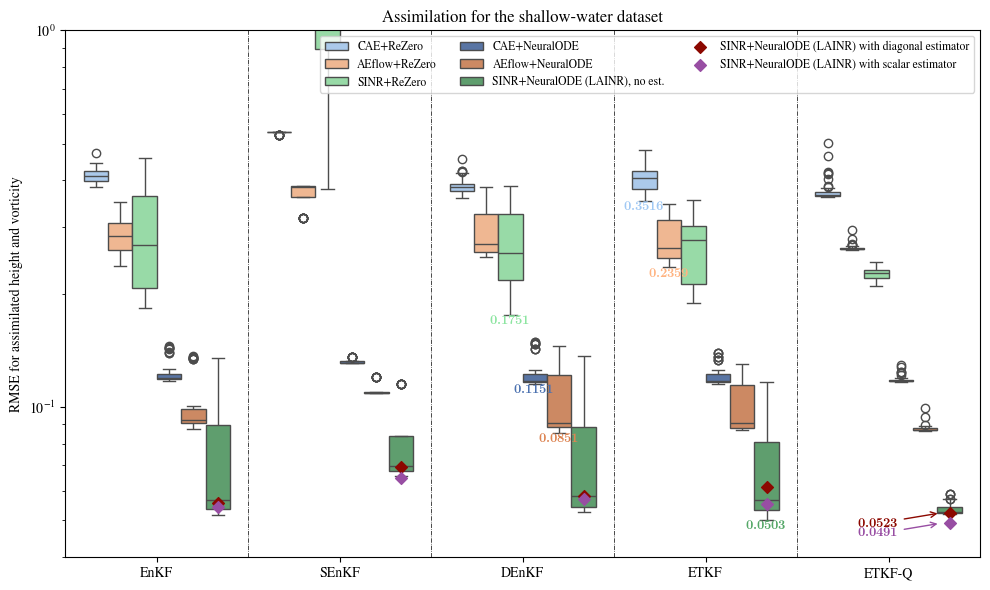

In [108]:
box_plot_rename = {
    'CAE+ReZero': 'CAE+ReZero',
    'AEflow+ReZero': 'AEflow+ReZero',
    'SINR+ReZero': 'SINR+ReZero',
    'CAE+NeuralODE': 'CAE+NeuralODE',
    'AEflow+NeuralODE': 'AEflow+NeuralODE',
    'SINR+NeuralODE': 'SINR+NeuralODE (LAINR), no est.',
}
ue_rename = {
    'SINR+NeuralODE+diagonal': 'SINR+NeuralODE (LAINR) with diagonal estimator',
    'SINR+NeuralODE+scalar': 'SINR+NeuralODE (LAINR) with scalar estimator',
}

palette_name = 'deep'

df_plot = df_avg_rmse[df_avg_rmse['ens_num'] == 64]

# df_plot = df_plot[df_plot['sigma_m'] > 5e-4]

print(df_plot['model'].unique())

df_boxplot = pd.concat([
    df_plot[df_plot['model'] == model_name]
    for model_name in box_plot_rename.keys()
])
df_boxplot['plotname'] = df_boxplot['model'].map(box_plot_rename)

colors = sns.palettes.color_palette('pastel', 3) + sns.palettes.color_palette('deep', 3)
colors_ue = [sns.palettes.color_palette('dark')[3], sns.palettes.color_palette('Set1')[3]]

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(df_boxplot, x='kf_name', y='rmse',
                 hue='plotname', palette=colors,
                 order=['EnKF', 'SEnKF', 'DEnKF', 'ETKF', 'ETKF-Q'],
                 hue_order=box_plot_rename.values(),
                 #  whis=(0, 100),
                 ax=ax)

# annotate the minimal value for each model
models = df_boxplot['plotname'].unique()
for k in range(len(models)):

    color = colors[k]
    xoffset = -.4 + .4 / len(models) * (2 * k + 1)
    model = models[k]

    df_model = df_boxplot[df_boxplot['plotname'] == model]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['kf_name'].unique()).index(min_row['kf_name'])
    print('bar size:', len(df_model[df_model['kf_name'] == 'EnKF']), end=' | ')
    print(
        f'{model}: {min_value:.4e}, {min_row["kf_name"]}, sigma_z_b={min_row["sigma_z_b"]}, sigma_m={min_row["sigma_m"]}, infl={min_row["infl"]}')
    ax.annotate(r'\small\textbf{' + f'{min_value:.4f}' + r'}',
                xy=(x_idx + xoffset, min_value),
                xytext=(0, -.2),
                textcoords='offset points',
                ha='center', va='top', color=color,
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

models_ue = ue_rename.keys()
for k, model in enumerate(models_ue):
    
    color=colors_ue[k]

    xlocs = []
    ylocs = []

    df_anno = df_avg_rmse[df_avg_rmse['model'] == model]
    # add diagonal estimator
    for xtick in ax.get_xticks():
        # idx = df[df['error']==min_value[xtick]].index.values
        df_anno_value = df_anno[df_anno['kf_name'] == df_plot['kf_name'].unique()[xtick]]['rmse'].min()
        # ax.text(xtick, low_whisker - 2, text,
        #               horizontalalignment='center', size='x-small', weight='semibold')
        print(df_anno_value)
        xlocs.append(xtick + .4 - .8 / len(models) / 2)
        ylocs.append(df_anno_value)
        # if xtick == 0:
        #     ax.scatter(xtick + .4 - .8 / len(models) / 2, df_anno_value, marker='D',
        #             color=colors[len(colors) - k - 1], label='w/ ' + model.split('+')[-1])
        # else:
        #     ax.scatter(xtick + .4 - .8 / len(models) / 2, df_anno_value, marker='D',
        #             color=colors[len(colors) - k - 1])

    ax.scatter(xlocs, ylocs, marker='D', color=color, label=ue_rename[model], zorder=100)

    # add diagonal estimator minimum
    min_idx = df_anno['rmse'].argmin()
    min_row = df_anno.iloc[min_idx]
    min_value = min_row['rmse']
    min_kf_idx = list(df_anno['kf_name'].unique()).index(min_row['kf_name'])
    ax.annotate(r'\small\textbf{' + f'{min_value:.4f}' + r'}',
                xy=(min_kf_idx + .4 - .8 / len(models) / 2 - .05, min_value),
                xytext=(-30, -3),
                textcoords='offset points',
                arrowprops=dict(arrowstyle="->", color=color),
                ha='right', va='top', color=color,
                # weight='bold',
                usetex=True,
                )
    print(
        f'{model}: {min_value:.4e}, {min_row["kf_name"]}, sigma_z_b={min_row["sigma_z_b"]}, sigma_m={min_row["sigma_m"]}, infl={min_row["infl"]}')

for model in df_boxplot['plotname'].unique():
    print(model)
    for column_name in ['kf_name', 'ens_num', 'infl', 'sigma_z_b', 'sigma_m']:
        print(f'\t{column_name}: {df_boxplot[df_boxplot["plotname"]==model][column_name].unique()}')

ax.set_yscale('log')
ax.set_ylim(4e-2, 1.)
ax.set_xlabel('')
ax.set_ylabel('RMSE for assimilated height and vorticity')
ax.set_title('Assimilation for the shallow-water dataset')
ax.legend(fontsize='small', ncol=3)
for x in ax.get_xticks()[:-1]:
    ax.axvline(x + .5, color='k', linestyle='-.', linewidth=.5)
ax.set_xlim(-.5, 4.5)
plt.tight_layout()
plt.savefig('sw_assimilate_boxplot.pdf', bbox_inches='tight', pad_inches=0)

['AEflow+NeuralODE' 'AEflow+ReZero' 'CAE+NeuralODE' 'CAE+ReZero'
 'SINR+NeuralODE' 'SINR+NeuralODE+diagonal' 'SINR+NeuralODE+scalar'
 'SINR+ReZero']
bar size: 63 | CAE+NeuralODE: 1.1513e-01, DEnKF, sigma_z_b=0.01, sigma_m=0.01, infl=1.02
bar size: 63 | AEflow+NeuralODE: 8.5083e-02, DEnKF, sigma_z_b=0.01, sigma_m=0.0003, infl=1.05
bar size: 63 | SINR+NeuralODE (LAINR w/o u.e.): 5.0258e-02, ETKF, sigma_z_b=0.03, sigma_m=0.001, infl=1.02
CAE+NeuralODE
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
AEflow+NeuralODE
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
SINR+NeuralODE (LAINR w/o u.e.)
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0

(-0.5, 4.5)

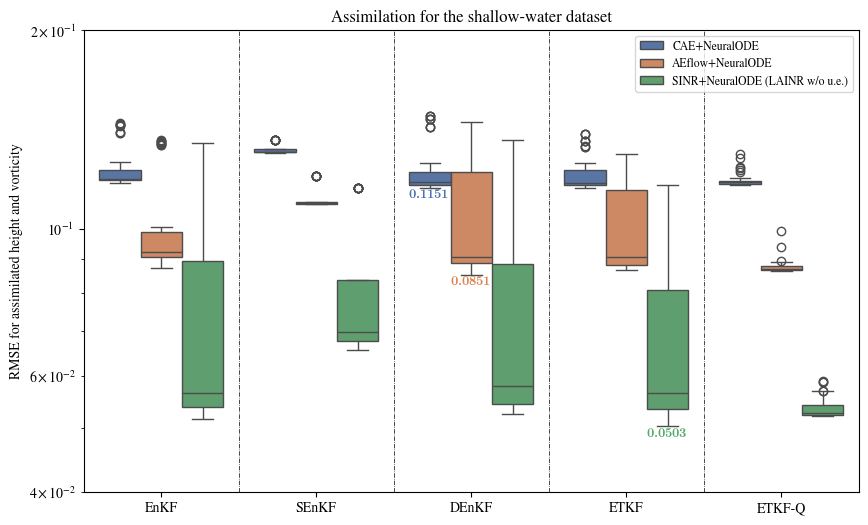

In [91]:
box_plot_rename = {
    'CAE+NeuralODE': 'CAE+NeuralODE',
    'AEflow+NeuralODE': 'AEflow+NeuralODE',
    'SINR+NeuralODE': 'SINR+NeuralODE (LAINR), no u.e.',
}
ue_rename = {
    'SINR+NeuralODE+diagonal': 'SINR+NeuralODE (LAINR) with diagonal estimator',
    'SINR+NeuralODE+scalar': 'SINR+NeuralODE (LAINR) with scalar estimator',
}

palette_name = 'deep'

df_plot = df_avg_rmse[df_avg_rmse['ens_num'] == 64]

# df_plot = df_plot[df_plot['sigma_m'] > 5e-4]

print(df_plot['model'].unique())

df_boxplot = pd.concat([
    df_plot[df_plot['model'] == model_name]
    for model_name in box_plot_rename.keys()
])
df_boxplot['plotname'] = df_boxplot['model'].map(box_plot_rename)

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(df_boxplot, x='kf_name', y='rmse',
                 hue='plotname', palette='deep',
                 #  whis=(0, 100),
                 ax=ax)

colors = sns.palettes.color_palette(palette_name, len(box_plot_rename))

# annotate the minimal value for each model
models = df_boxplot['plotname'].unique()
for k in range(len(models)):

    color = colors[k]
    xoffset = -.4 + .4 / len(models) * (2 * k + 1)
    model = models[k]

    df_model = df_boxplot[df_boxplot['plotname'] == model]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['kf_name'].unique()).index(min_row['kf_name'])
    print('bar size:', len(df_model[df_model['kf_name'] == 'EnKF']), end=' | ')
    print(
        f'{model}: {min_value:.4e}, {min_row["kf_name"]}, sigma_z_b={min_row["sigma_z_b"]}, sigma_m={min_row["sigma_m"]}, infl={min_row["infl"]}')
    ax.annotate(r'\small\textbf{' + f'{min_value:.4f}' + r'}',
                xy=(x_idx + xoffset, min_value),
                xytext=(0, -.2),
                textcoords='offset points',
                ha='center', va='top', color=color,
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

for model in df_boxplot['plotname'].unique():
    print(model)
    for column_name in ['kf_name', 'ens_num', 'infl', 'sigma_z_b', 'sigma_m']:
        print(f'\t{column_name}: {df_boxplot[df_boxplot["plotname"]==model][column_name].unique()}')

ax.set_yscale('log')
ax.set_ylim(4e-2, .2)
ax.set_xlabel('')
ax.set_ylabel('RMSE for assimilated height and vorticity')
ax.set_title('Assimilation for the shallow-water dataset')
ax.legend(fontsize='small')
for x in ax.get_xticks()[:-1]:
    ax.axvline(x + .5, color='k', linestyle='-.', linewidth=.5)
ax.set_xlim(-.5, 4.5)

bar size: 126 | CAE+ReZero: 3.5157e-01, ETKF, sigma_z_b=0.1, sigma_m=0.0001, infl=1.1
bar size: 126 | AEflow+ReZero: 2.3587e-01, ETKF, sigma_z_b=0.1, sigma_m=0.001, infl=1.05


ValueError: attempt to get argmin of an empty sequence

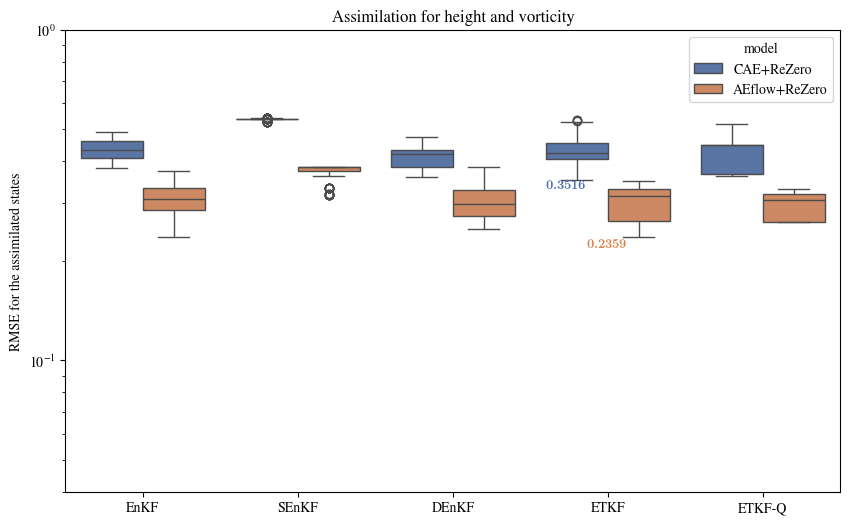

In [92]:
fig, ax = plt.subplots(figsize=(10, 6))

models = 'CAE+ReZero', 'AEflow+ReZero', 'SINR+NeuralODE (LAINR w/o u.e.)'

df_plot = pd.concat([
    df_avg_rmse[df_avg_rmse['model'] == 'CAE+ReZero'],
    df_avg_rmse[df_avg_rmse['model'] == 'AEflow+ReZero'],
    df_avg_rmse[df_avg_rmse['model'] == 'SINR+NeuralODE (LAINR w/o u.e.)']
])

# df_plot[df_plot['model'] == 'SINR+NeuralODE'] = 'SINR+NeuralODE (LAINR, ours)'

models_ue = [
    'SINR+NeuralODE+diagonal (LAINR w/ u.e.)',
    'SINR+NeuralODE+scalar (LAINR w/ u.e.)',
]


palette_name = 'deep'

ax = sns.boxplot(df_plot, x='kf_name', y='rmse',
                 hue='model', palette=palette_name,
                 #  whis=(0, 100),
                 ax=ax
                 )

ax.set_yscale('log')
ax.set_ylim(4e-2, 1.)
ax.set_xlabel('')
ax.set_ylabel('RMSE for the assimilated states')
ax.set_title('Assimilation for height and vorticity')

colors = sns.palettes.color_palette(palette_name, len(models) + len(models_ue))

# annotate the minimal value for each model
for k, (xoffset, model) in enumerate(zip([-.8 / 3, 0, .8 / 3], models)):
    df_model = df_avg_rmse[df_avg_rmse['model'] == model]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['kf_name'].unique()).index(min_row['kf_name'])
    print('bar size:', len(df_model[df_model['kf_name'] == 'EnKF']), end=' | ')
    print(
        f'{model}: {min_value:.4e}, {min_row["kf_name"]}, sigma_z_b={min_row["sigma_z_b"]}, sigma_m={min_row["sigma_m"]}, infl={min_row["infl"]}')
    ax.annotate(r'\small\textbf{' + f'{min_value:.4f}' + r'}'                # +f'\n$\\sigma^m={min_row["sigma_m"]}$, $\\sigma_z^b={min_row["sigma_z_b"]}$'
                ,
                xy=(x_idx + xoffset, min_value),
                xytext=(0, -.2),
                textcoords='offset points',
                ha='center', va='top', color=colors[k],
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

for k, model in enumerate(models_ue):

    xlocs = []
    ylocs = []

    df_anno = df_avg_rmse[df_avg_rmse['model'] == model]
    # add diagonal estimator
    for xtick in ax.get_xticks():
        # idx = df[df['error']==min_value[xtick]].index.values
        df_anno_value = df_anno[df_anno['kf_name'] == df_plot['kf_name'].unique()[xtick]]['rmse'].min()
        # ax.text(xtick, low_whisker - 2, text,
        #               horizontalalignment='center', size='x-small', weight='semibold')
        print(df_anno_value)
        xlocs.append(xtick + .4 - .8 / len(models) / 2)
        ylocs.append(df_anno_value)
        # if xtick == 0:
        #     ax.scatter(xtick + .4 - .8 / len(models) / 2, df_anno_value, marker='D',
        #             color=colors[len(colors) - k - 1], label='w/ ' + model.split('+')[-1])
        # else:
        #     ax.scatter(xtick + .4 - .8 / len(models) / 2, df_anno_value, marker='D',
        #             color=colors[len(colors) - k - 1])

    ax.scatter(
        xlocs, ylocs, marker='D', color=colors[len(colors) - k - 1], label=model, zorder=100)

    # add diagonal estimator minimum
    min_idx = df_anno['rmse'].argmin()
    min_row = df_anno.iloc[min_idx]
    min_value = min_row['rmse']
    min_kf_idx = list(df_anno['kf_name'].unique()).index(min_row['kf_name'])
    ax.annotate(r'\small\textbf{' + f'{min_value:.4f}' + r'}',
                xy=(min_kf_idx + .4 - .8 / len(models) / 2 - .05, min_value),
                xytext=(-30, -3),
                textcoords='offset points',
                arrowprops=dict(arrowstyle="->", color=colors[len(colors) - k - 1]),
                ha='right', va='top', color=colors[len(colors) - k - 1],
                # weight='bold',
                usetex=True,
                )


ax.legend(fontsize='small')
for x in ax.get_xticks()[:-1]:
    ax.axvline(x + .5, color='k', linestyle='-.', linewidth=.5)
ax.set_xlim(-.5, 4.5)
plt.savefig('sw_assimilate_boxfig.pdf', bbox_inches='tight')